<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-geomechanics/blob/master/homework%208/homework8_resgeomech_finally.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 8. Identifying Critically Stressed Fractures**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!git clone https://github.com/yohanesnuwara/reservoir-geomechanics

Cloning into 'reservoir-geomechanics'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 230 (delta 42), reused 0 (delta 0), pack-reused 135
Receiving objects: 100% (230/230), 13.92 MiB | 34.26 MiB/s, done.
Resolving deltas: 100% (98/98), done.


Access dip data from Barnett fracture data in Homework 5

,depth,strike,dip,dip_direction,aperture
0,5200.824,228.25,76.41,318.25,4.31
1,5200.965,207.80,86.11,297.80,5.87
2,5205.068,233.97,84.07,323.97,7.22
3,5208.820,206.68,82.67,296.68,5.52
4,5221.970,214.65,77.20,304.65,5.44
5,5232.421,211.99,79.37,301.99,9.95
6,5248.538,214.61,79.88,304.61,12.24
7,5252.678,226.41,84.78,316.41,10.21
8,5269.203,245.50,80.63,335.50,8.22
9,5280.625,238.08,81.70,328.08,2.67


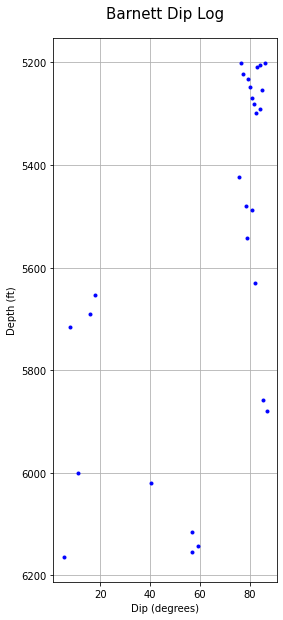

In [0]:
fracture = pd.read_csv('/content/reservoir-geomechanics/homework 5/Barnett_fractures.csv')

frac_depth = fracture.depth
frac_dip = fracture.dip

# visualize the dip data
plt.figure(figsize=(4,10))
plt.plot(frac_dip, frac_depth, '.', color='blue')
plt.title("Barnett Dip Log", pad=20, size=15)
plt.xlabel("Dip (degrees)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.gca().invert_yaxis()

fracture.head(10)

## Information

At depth 5725 ft

The maximum horizontal stress ($SH$) is assumed to be the lower bound of $SH$ in Homework 7. Because the minimum horizontal stress ($Sh$) measured from LOT is 3721.25 psi and the $SH$ lower bound is 3721.25 psi, therefore $Sh=SH<Sv$ or in regime **radial extension**

* Sv gradient from HW 1
* Pore pressure gradient from HW 7
* Friction coefficient from HW 7
* Shmin gradient from HW 7
* SHmax gradient from HW 7 (as lower bound of SHmax)

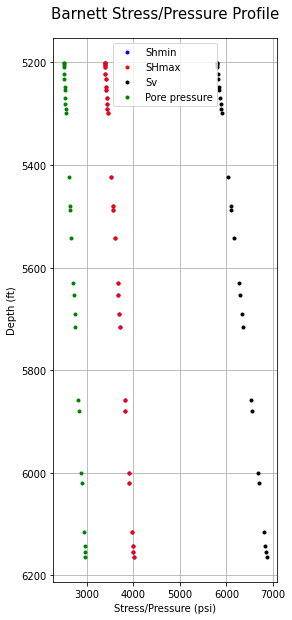

In [0]:
depth = 5725 # ft

# from homework 7
Sh = 3721.25 # psi
SH = Sh
Sv = 6374.8
Pp = 2748
mu = 0.75

# gradient of stresses
Sh_grad = Sh / depth
SH_grad = Sh_grad
Sv_grad = Sv / depth
Pp_grad = Pp / depth

# visualize the stress data
plt.figure(figsize=(4,10))
p1 = plt.plot((frac_depth * Sh_grad), frac_depth, '.', color='blue')
p2 = plt.plot((frac_depth * SH_grad), frac_depth, '.', color='red')
p3 = plt.plot((frac_depth * Sv_grad), frac_depth, '.', color='black')
p4 = plt.plot((frac_depth * Pp_grad), frac_depth, '.', color='green')

plt.title("Barnett Stress/Pressure Profile", pad=20, size=15)
plt.legend((p1[0], p2[0], p3[0], p4[0]), (['Shmin', 'SHmax', 'Sv', 'Pore pressure']))
plt.xlabel("Stress/Pressure (psi)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.gca().invert_yaxis()

## Question 1a. From the first homework assignment, what is the calculated gradient of the overburden stress of the site at 5725 feet depth in psi/ft?

In [0]:
print('Gradient of overburden stress:', Sv_grad, 'psi/ft')

Gradient of overburden stress: 1.1135021834061136 psi/ft


## Question 1b. From the seventh homework assignment, what is the given gradient of the minimum horizontal stress of the site at 5725 feet depth in psi/ft?

In [0]:
print('Gradient of minimum horizontal stress:', Sh_grad, 'psi/ft')

Gradient of minimum horizontal stress: 0.65 psi/ft


## Question 1c. From the seventh homework assignment, what is the estimated lower bound of the gradient of the maximum horizontal stress of the site at 5725 feet depth in psi/ft?

In [0]:
print('Gradient of maximum horizontal stress:', SH_grad, 'psi/ft')

Gradient of maximum horizontal stress: 0.65 psi/ft


## Question 1d. From the seventh homework assignment, what is the given gradient of the pore pressure of the site at 5725 feet depth in psi/ft?

In [0]:
print('Gradient of pore pressure:', Pp_grad, 'psi/ft')

Gradient of pore pressure: 0.48 psi/ft


## Question 1e. From the seventh homework assignment, what is the given coefficient of sliding friction of the site at 5725 feet depth?

In [0]:
print('Coefficient of sliding friction:', mu)

Coefficient of sliding friction: 0.75


## Question 2a. How many fractures are critically stressed with the condition given above?

* $\mu=0.75$
* $\Delta Pp=0.48 psi/ft$

Mohr-Coulomb Diagram

Number of critical fractures:  0 



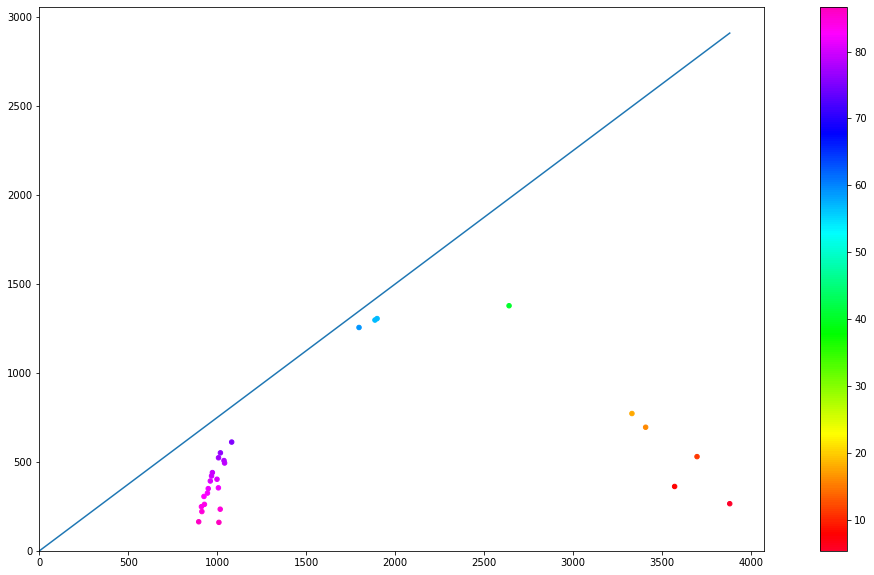

In [0]:
# principal stresses
S1 = frac_depth * Sv_grad
S3 = frac_depth * Sh_grad
Pp = frac_depth * Pp_grad

# effective normal stress and shear stress
normal = (0.5 * (S1 + S3)) + (0.5 * (S1 - S3) * np.cos(np.deg2rad(2 * frac_dip)))
normal_eff = normal - Pp
shear = 0.5 * (S1 - S3) * np.sin(np.deg2rad(2 * frac_dip))

# failure envelope
normal_env = np.linspace(0, max(normal_eff), 10)
mu = 0.75
shear_env = mu * normal_env

plt.figure(figsize=(20,10))
plt.plot(normal_env, shear_env)
plt.scatter(normal_eff, shear, c=frac_dip, s=20, cmap='gist_rainbow')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.colorbar()
plt.gca().set_aspect('equal')

# counting critically stressed fractures
envelope = mu * normal_eff
difference = envelope - shear

critical = [i for i in difference if i < 0] 
critical_count_1 = len(critical) 
print("Number of critical fractures: ", critical_count_1, "\n") 

## Question 2b. How many fractures are critically stressed if the pore pressure gradient is 0.52 psi/ft (Montgomery et al., 2005)?

* $\mu=0.75$
* $\Delta Pp=0.52 psi/ft$ 

Number of critical fractures:  3 



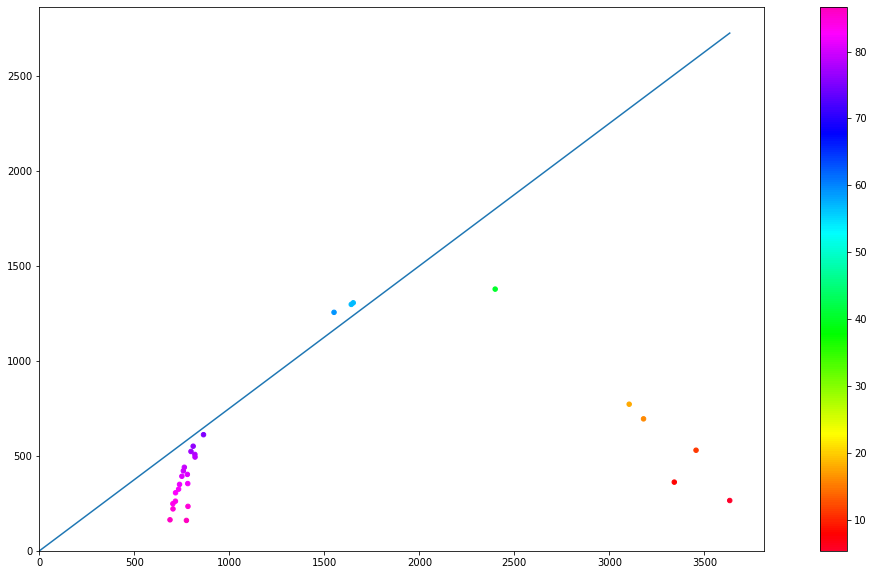

In [0]:
# principal stresses
S1 = frac_depth * Sv_grad
S3 = frac_depth * Sh_grad
Pp = frac_depth * 0.52

# effective normal stress and shear stress
normal = (0.5 * (S1 + S3)) + (0.5 * (S1 - S3) * np.cos(np.deg2rad(2 * frac_dip)))
normal_eff = normal - Pp
shear = 0.5 * (S1 - S3) * np.sin(np.deg2rad(2 * frac_dip))

# failure envelope
normal_env = np.linspace(0, max(normal_eff), 10)
mu = 0.75
shear_env = mu * normal_env

plt.figure(figsize=(20,10))
plt.plot(normal_env, shear_env)
plt.scatter(normal_eff, shear, c=frac_dip, s=20, cmap='gist_rainbow')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.colorbar()
plt.gca().set_aspect('equal')

# counting critically stressed fractures
envelope = mu * normal_eff
difference = envelope - shear

critical = [i for i in difference if i < 0] 
critical_count_2 = len(critical) 
print("Number of critical fractures: ", critical_count_2, "\n") 

## Question 2c. How many fractures are critically stressed if the frictional sliding coefficient is 0.45 (Kohli and Zoback, 2013)?

* $\mu=0.45$
* $\Delta Pp=0.48 psi/ft$ 

Number of critical fractures:  10 



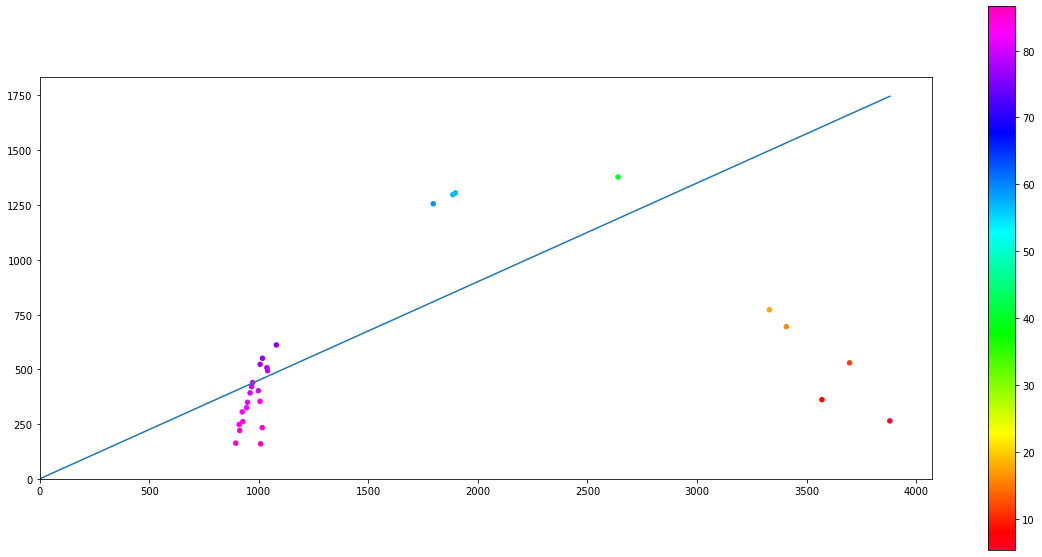

In [0]:
# principal stresses
S1 = frac_depth * Sv_grad
S3 = frac_depth * Sh_grad
Pp = frac_depth * Pp_grad

# effective normal stress and shear stress
normal = (0.5 * (S1 + S3)) + (0.5 * (S1 - S3) * np.cos(np.deg2rad(2 * frac_dip)))
normal_eff = normal - Pp
shear = 0.5 * (S1 - S3) * np.sin(np.deg2rad(2 * frac_dip))

# failure envelope
normal_env = np.linspace(0, max(normal_eff), 10)
mu = 0.45
shear_env = mu * normal_env

plt.figure(figsize=(20,10))
plt.plot(normal_env, shear_env)
plt.scatter(normal_eff, shear, c=frac_dip, s=20, cmap='gist_rainbow')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.colorbar()
plt.gca().set_aspect('equal')

# counting critically stressed fractures
envelope = mu * normal_eff
difference = envelope - shear

critical = [i for i in difference if i < 0] 
critical_count_3 = len(critical) 
print("Number of critical fractures: ", critical_count_3, "\n") 